In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Using UTF-8 for loading because some driver names and track names have weird characters
df = pd.read_csv('data/archive/f1_pitstops_2018_2024.csv', encoding='utf-8', delimiter=',')

In [3]:
df.head(len(df))

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Tire Usage Aggression,Fast Lap Attempts,Position Changes,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,0.017241,44.76882,0.000000,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787
1,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,0.017241,44.76882,0.000000,6.755003,VET,2.0,SOFT,32.0,NaN,Final Stint
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,0.017241,44.73482,0.043478,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821
3,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,0.017241,44.73482,0.043478,6.754254,HAM,2.0,SOFT,39.0,NaN,Final Stint
4,2018,1,Albert Park Grand Prix Circuit,Kimi RÃƒÂ¤ikkÃƒÂ¶nen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,0.017241,45.13482,0.086957,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,0.033333,25.41182,0.739130,3.930495,BOT,1.0,MEDIUM,6.0,6.0,41.144
7370,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,0.033333,25.41182,0.739130,3.930495,BOT,2.0,HARD,24.0,NaN,Final Stint
7371,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,0.038462,41.61482,0.782609,6.364719,COL,1.0,MEDIUM,3.0,3.0,24.941
7372,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,0.038462,41.61482,0.782609,6.364719,COL,2.0,HARD,23.0,NaN,Final Stint


# Dataset Feature Description

* **Season --** Year of the Formula 1 Season
* **Round --** Race number within the Formula 1 season (in question)
* **Circuit --** At what circuit the race was held (with respect to the country)   
* **Driver --** Full name of the Driver
* **Constructor --** Registered name of the Constructor taking participating in the race (Car Manufacturer/Team)
* **Laps --** Number of Laps completed
* **Position --** Finishing position of the driver
* **TotalPitStops --** Total number of pit stops taken by the driver 
* **Race Name --** Name of the Race at the circuit
* **Date --** Date of the race
* **Time_of_race --** Time of the race
* **Location --** Location of the race (in that Country)
* **Country --** Demographic Location on Earth
* **Air_Temp_C --** Average Air Temperature during the race (°C)
* **Track_Temp_C --** Average Track Temperature during the race (°C)
* **Humidity_% --** Measured Humidity (%)
* **Wind_Speed_KMH --** Measured Wind Speed
* **Lap Time Variation --** Variation of the driver's lap times during the race
* **Total Pit Stops --** Total number of pit stops by the driver
* **Tire Usage Aggression --** Aggression score is a reflection of the longitudinal g-force each driver generates, both through acceleration and retardation
* **Fast Lap Attempts --** Total number of attempts for Fastest Lap of the race
* **Position Changes --** Frequency of race position changes
* **Driver Aggression Score --** Driver aggression score
* **Abbreviation --** Abbreviation of the driver name (usually three characters)
* **Stint --** Period a driver spends on the track between pit stops (Pit stop count basically which is Nominal) 
* **Tyre Compound --** Type of tyre fitted on the car for that stint
* **Stint Length --** Total Laps in the stint
* **Pit_Lap --** Lap when driver enters the pits (Nominal feature)
* **Pit Time --** Time spent in the pit lanes (s)

## A bit of a lecture for context

In this dataset there are a few things to know for context

The dataset is understood to be divided into 6 major parts (6 seasons), 22 subparts (22 rounds each season) and depending on how many pitstops a 
driver makes, a data entry is created

### TYRES
Tyres come in different types known as compounds. Tyre compounds go from SUPER-HARD to HYPER-SOFT (Until after the 2019 Season), with later compounds made simpler - (HARD - SOFT)
* HARD (or SUPER HARD) -> Least amount of grip, Longest life span
* SOFT (or HYPER SOFT) -> Strongest grip, Shortest life span

However these are logically used in dry conditions, during damp or wet conditions teams have two choices:
* INTERMEDIATE -> Provides the most grip in wet conditions while maintaining the most downforce
* WET -> Provides grip, while clearing standing water on track (When it's raining cats 'n dogs)


# RULES
***A DRIVER MUST USE AT LEAST TWO TYRE COMPOUNDS DURING A RACE***, meaning there's only $(n - 1)$ pit-stops for every entry present

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7374 entries, 0 to 7373
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   7374 non-null   int64  
 1   Round                    7374 non-null   int64  
 2   Circuit                  7374 non-null   object 
 3   Driver                   7374 non-null   object 
 4   Constructor              7374 non-null   object 
 5   Laps                     7374 non-null   int64  
 6   Position                 7374 non-null   int64  
 7   TotalPitStops            7374 non-null   int64  
 8   AvgPitStopTime           7189 non-null   float64
 9   Race Name                7001 non-null   object 
 10  Date                     7001 non-null   object 
 11  Time_of_race             7001 non-null   object 
 12  Location                 7001 non-null   object 
 13  Country                  7001 non-null   object 
 14  Air_Temp_C              

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,7374.0,2021.308245,1.969604,2018.000000,2020.000000,2021.000000,2023.000000,2024.000000
Round,7374.0,10.673312,6.135126,1.000000,5.000000,11.000000,15.000000,24.000000
Laps,7374.0,56.643748,13.922667,0.000000,52.000000,57.000000,66.000000,87.000000
Position,7374.0,10.156089,5.590062,1.000000,5.000000,10.000000,15.000000,20.000000
TotalPitStops,7374.0,2.068348,1.135088,0.000000,1.000000,2.000000,3.000000,7.000000
AvgPitStopTime,7189.0,120.109095,268.723688,17.358500,22.388000,24.414000,30.068000,3055.732000
Air_Temp_C,7001.0,19.520345,5.092982,0.387500,15.958333,19.633333,23.750000,33.295833
Track_Temp_C,7001.0,25.207104,5.195562,5.887500,21.587500,25.175000,29.504167,39.795833
Humidity_%,7001.0,67.576191,14.157319,18.375000,60.500000,70.500000,77.291667,94.333333
Wind_Speed_KMH,7001.0,11.434032,6.073363,3.362500,6.804167,9.408333,15.550000,35.908333


In [6]:
print(df.isna().sum())

Season                        0
Round                         0
Circuit                       0
Driver                        0
Constructor                   0
Laps                          0
Position                      0
TotalPitStops                 0
AvgPitStopTime              185
Race Name                   373
Date                        373
Time_of_race                373
Location                    373
Country                     373
Air_Temp_C                  373
Track_Temp_C                373
Humidity_%                  373
Wind_Speed_KMH              373
Lap Time Variation          185
Total Pit Stops               0
Tire Usage Aggression        66
Fast Lap Attempts           185
Position Changes              0
Driver Aggression Score     185
Abbreviation                  0
Stint                       109
Tire Compound               109
Stint Length                109
Pit_Lap                    2810
Pit_Time                    281
dtype: int64


Numerical Columns with missing values will be handled with the imputation of mean or median values depending on it's use
Categorical columns will also be handled similarly with a few other logic to be ap|plied

In [7]:
# DUPLICATES
print(f'Duplicates in dataframe: {df.duplicated().sum()}, ({np.round(100 * df.duplicated().sum() / len(df), 1)}%)')

Duplicates in dataframe: 0, (0.0%)


No duplicates, Sjajno

In [8]:
df.nunique()

Season                        7
Round                        24
Circuit                      31
Driver                       40
Constructor                  16
Laps                         78
Position                     20
TotalPitStops                 8
AvgPitStopTime             2492
Race Name                    30
Date                        134
Time_of_race                 26
Location                     27
Country                      24
Air_Temp_C                  132
Track_Temp_C                132
Humidity_%                  128
Wind_Speed_KMH              132
Lap Time Variation         2492
Total Pit Stops               8
Tire Usage Aggression       153
Fast Lap Attempts          2492
Position Changes             20
Driver Aggression Score    2636
Abbreviation                 38
Stint                         8
Tire Compound                 9
Stint Length                 72
Pit_Lap                      71
Pit_Time                   3841
dtype: int64

There's 24 Rounds every season. Taking the most prominent tracks/rounds from each season, I'll try to form a trend or relationship between the features:
Relevant columns and the target. This is mostly because some tracks (rounds) weren't constant the whole 7 seasons, however some were.

### Identifying Outliers

In [9]:
# Obtain numerical columns
# numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols = ['Pit_Time', 'Stint Length', 'Position Changes', 'Air_Temp_C', 'Track_Temp_C', 'Humidity_%', 'Wind_Speed_KMH']

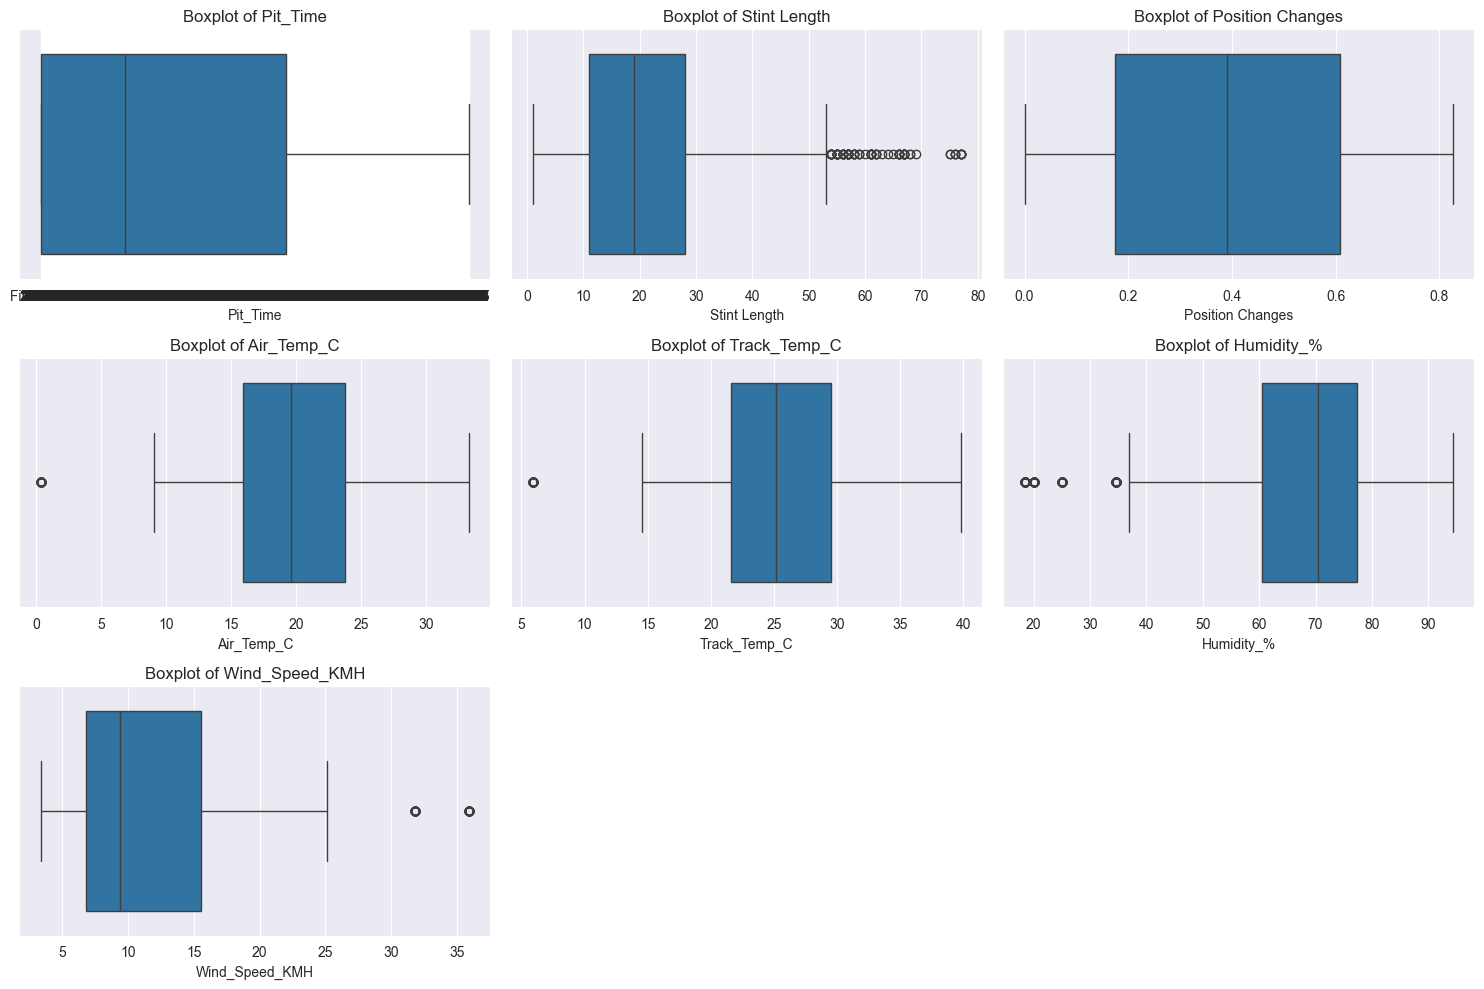

In [10]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()

In [11]:
# Most of these plots seemed okay, however:
# - Plots for PIT_TIMES, STINT LENGTH & WIND_SPEED were clearly negatively sc

In [12]:
# print(df['Pit_Time'].sample(100).tolist())

In [13]:
final_stints = (df['Pit_Time'] == 'Final Stint')
normal_stints = ((df['Pit_Time'] != 'Final Stint') | df['Pit_Time'].apply(lambda x: isinstance(x, (int, float))))

print(f"Normal Stints {normal_stints.sum()}\nFinal Stints in Pit Time Column: {final_stints.sum()}")

# Every normal stint value happened to be in string format, while missing values were 'missing numerical values'.
# The comparison lies within strings here

stints = pd.DataFrame({ 
    'Normal_Stints': normal_stints, 
    'Final_Stints': final_stints
})
stints

Normal Stints 4845
Final Stints in Pit Time Column: 2529


,Normal_Stints,Final_Stints
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
...,...,...
7369,True,False
7370,False,True
7371,True,False
7372,False,True


By the looks of it, it's better to handle the NaNs and Final Stint Values from the Pit_Lap and Pit_Time as such:
* NaNs most likely indicate the final stint - meaning they didn't pit -- **Impute the Max Lap for the race**
* Final Stint Values means the next pitstop was literally at Parc Ferme -- **Impute with 0 meaning EOR**

In [14]:
df['Max_Stint'] = df.groupby(['Season', 'Round', 'Driver'])['Stint'].transform('max')
df['Is_Final_Stint'] = (df['Stint'] == df['Max_Stint'])

print(f"Total rows: {len(df)}")
print(f"Final stints identified: {df['Is_Final_Stint'].sum()}")

Total rows: 7374
Final stints identified: 2712


## Handline Pit Laps

In [15]:
max_laps = df.groupby(['Season', 'Round'])['Laps'].transform('max')

mask_final_stint_missing_pit_lap = df['Is_Final_Stint'] & df['Pit_Lap'].isna()
print(f"Missing Pit_Lap values in final stints: {mask_final_stint_missing_pit_lap.sum()}")

Missing Pit_Lap values in final stints: 2696


In [16]:
df.loc[mask_final_stint_missing_pit_lap, 'Pit_Lap'] = max_laps[mask_final_stint_missing_pit_lap]

mask_non_final_missing_pit_lap = (~df['Is_Final_Stint']) & df['Pit_Lap'].isna()
print(f"Missing Pit_Lap values in non-final stints: {mask_non_final_missing_pit_lap.sum()}")

Missing Pit_Lap values in non-final stints: 114


In [17]:
if 'Stint Length' in df.columns:
    df.loc[mask_non_final_missing_pit_lap, 'Pit_Lap'] = df.loc[mask_non_final_missing_pit_lap, 'Stint Length']
    
else:
    # If Stint Length is not available, use the median pit lap for that driver in that race
    for idx in df[mask_non_final_missing_pit_lap].index:
        season = df.loc[idx, 'Season']
        round_num = df.loc[idx, 'Round']
        driver = df.loc[idx, 'Driver']

        # Get median pit lap for this driver in this race
        median_pit_lap = df[(df['Season'] == season) & (df['Round'] == round_num) & (df['Driver'] == driver) & df['Pit_Lap'].notna()]['Pit_Lap'].median()

        if not pd.isna(median_pit_lap):
            df.loc[idx, 'Pit_Lap'] = median_pit_lap
            
        else:
            # If no data for this driver, use median for this race
            race_median = df[(df['Season'] == season) & (df['Round'] == round_num) & df['Pit_Lap'].notna()]['Pit_Lap'].median()
            df.loc[idx, 'Pit_Lap'] = race_median if not pd.isna(race_median) else 20  # Default to 20 if no data


## Handling Pit Time

In [18]:
mask_final_stint_values = df['Pit_Time'] == 'Final Stint'
print(f"'Final Stint' values in Pit_Time: {mask_final_stint_values.sum()}")

'Final Stint' values in Pit_Time: 2529


In [19]:
# Converting Pit_Time to numeric, handling 'Final Stint' values

df['Pit_Time_Numeric'] = pd.to_numeric(df['Pit_Time'], errors='coerce')
df.loc[mask_final_stint_values, 'Pit_Time_Numeric'] = 0  # Set 'Final Stint' to 0

mask_final_stint_missing_pit_time = df['Is_Final_Stint'] & df['Pit_Time_Numeric'].isna()
print(f"Missing Pit_Time values in final stints: {mask_final_stint_missing_pit_time.sum()}")

df.loc[mask_final_stint_missing_pit_time, 'Pit_Time_Numeric'] = 0

Missing Pit_Time values in final stints: 171


In [20]:
# For missing values in non-final stints, impute using team's typical pit time at that circuit
mask_non_final_missing_pit_time = (~df['Is_Final_Stint']) & df['Pit_Time_Numeric'].isna()
print(f"Missing Pit_Time values in non-final stints: {mask_non_final_missing_pit_time.sum()}")

Missing Pit_Time values in non-final stints: 110


In [21]:
for idx in df[mask_non_final_missing_pit_time].index:
    constructor = df.loc[idx, 'Constructor']
    circuit = df.loc[idx, 'Circuit']

    # Try to get team's typical pit time at this circuit
    team_circuit_median = df[(df['Constructor'] == constructor) & (df['Circuit'] == circuit) &
                             (~mask_final_stint_values) &  # Excluding 'Final Stint'
                             df['Pit_Time_Numeric'].notna()]['Pit_Time_Numeric'].median()

    if not pd.isna(team_circuit_median):
        df.loc[idx, 'Pit_Time_Numeric'] = team_circuit_median
    else:
        # If no data for this team at this circuit, use team's overall median
        team_median = df[(df['Constructor'] == constructor) &
                         (~mask_final_stint_values) &  # Excluding 'Final Stint'
                         df['Pit_Time_Numeric'].notna()]['Pit_Time_Numeric'].median()

        if not pd.isna(team_median):
            df.loc[idx, 'Pit_Time_Numeric'] = team_median
        else:
            # If still no data, use overall median
            overall_median = df[(~mask_final_stint_values) &
                                df['Pit_Time_Numeric'].notna()]['Pit_Time_Numeric'].median()
            df.loc[idx, 'Pit_Time_Numeric'] = overall_median

In [22]:
# Clean up the original Pit_Time column by replacing with our numeric version
df['Pit_Time'] = df['Pit_Time_Numeric']

# Check for any remaining missing values
missing_pit_lap = df['Pit_Lap'].isna().sum()
missing_pit_time = df['Pit_Time'].isna().sum()

In [23]:
# Check for any remaining missing values
missing_pit_lap = df['Pit_Lap'].isna().sum()
missing_pit_time = df['Pit_Time'].isna().sum()

print("\nAfter imputation:")
print(f"Missing Pit_Lap values: {missing_pit_lap}")
print(f"Missing Pit_Time values: {missing_pit_time}")


After imputation:
Missing Pit_Lap values: 109
Missing Pit_Time values: 0


In [24]:
df

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time,Max_Stint,Is_Final_Stint,Pit_Time_Numeric
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787,2.0,False,21.787
1,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,2.0,SOFT,32.0,58.0,0.000,2.0,True,0.000
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821,2.0,False,21.821
3,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,2.0,SOFT,39.0,58.0,0.000,2.0,True,0.000
4,2018,1,Albert Park Grand Prix Circuit,Kimi RÃƒÂ¤ikkÃƒÂ¶nen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421,2.0,False,21.421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,3.930495,BOT,1.0,MEDIUM,6.0,6.0,41.144,2.0,False,41.144
7370,2024,24,Yas Marina Circuit,Valtteri Bottas,Sauber,30,18,1,41.144,Abu Dhabi Grand Prix,...,3.930495,BOT,2.0,HARD,24.0,58.0,0.000,2.0,True,0.000
7371,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,6.364719,COL,1.0,MEDIUM,3.0,3.0,24.941,2.0,False,24.941
7372,2024,24,Yas Marina Circuit,Franco Colapinto,Williams,26,19,1,24.941,Abu Dhabi Grand Prix,...,6.364719,COL,2.0,HARD,23.0,58.0,0.000,2.0,True,0.000


In [25]:
print(df.isna().sum())

Season                       0
Round                        0
Circuit                      0
Driver                       0
Constructor                  0
Laps                         0
Position                     0
TotalPitStops                0
AvgPitStopTime             185
Race Name                  373
Date                       373
Time_of_race               373
Location                   373
Country                    373
Air_Temp_C                 373
Track_Temp_C               373
Humidity_%                 373
Wind_Speed_KMH             373
Lap Time Variation         185
Total Pit Stops              0
Tire Usage Aggression       66
Fast Lap Attempts          185
Position Changes             0
Driver Aggression Score    185
Abbreviation                 0
Stint                      109
Tire Compound              109
Stint Length               109
Pit_Lap                    109
Pit_Time                     0
Max_Stint                  109
Is_Final_Stint               0
Pit_Time

In [26]:
# Checking for inconsistent driver names or teams
print(f"Unique drivers: {df['Driver'].nunique()}")
print(f"Unique Teams: {df['Constructor'].nunique()}")

Unique drivers: 40
Unique Teams: 16


In [27]:
name_encoding_fixes = {
    'Kimi RÃƒÂ¤ikkÃƒÂ¶nen': 'Kimi Räikkönen',
    'Nico HÃƒÂ¼lkenberg': 'Nico Hülkenberg',
    'Sergio PÃƒÂ©rez': 'Sergio Pérez'
}

track_encoding_fixes = {
    'AutÃƒÂ³dromo Hermanos RodrÃƒÂ­guez': 'Autódromo Hermanos Rodríguez',
    'AutÃƒÂ³dromo Internacional do Algarve': 'Autódromo Internacional do Algarve',
    'NÃƒÂ¼rburgring': 'Nürburgring',
    'AutÃƒÂ³dromo JosÃƒÂ© Carlos Pace': 'Autódromo José Carlos Pace'
}

In [28]:
for incorrect, correct in name_encoding_fixes.items():
    df['Driver'] = df['Driver'].replace(incorrect, correct)

for incorrect, correct in track_encoding_fixes.items():
    df['Circuit'] = df['Circuit'].replace(incorrect, correct)
    
df.head(5)

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time,Max_Stint,Is_Final_Stint,Pit_Time_Numeric
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787,2.0,False,21.787
1,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,6.755003,VET,2.0,SOFT,32.0,58.0,0.000,2.0,True,0.000
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821,2.0,False,21.821
3,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,6.754254,HAM,2.0,SOFT,39.0,58.0,0.000,2.0,True,0.000
4,2018,1,Albert Park Grand Prix Circuit,Kimi Räikkönen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421,2.0,False,21.421


In [29]:
# There could also be an inconsistency in circuit names
print(f"Unique Circuits: {df['Circuit'].nunique()}")
print(f"Circuit Value counts {df['Circuit'].value_counts()}")

Unique Circuits: 31
Circuit Value counts Circuit
Bahrain International Circuit           507
Red Bull Ring                           468
Silverstone Circuit                     432
Circuit de Barcelona-Catalunya          402
Hungaroring                             396
Autodromo Nazionale di Monza            321
Circuit of the Americas                 308
Circuit de Spa-Francorchamps            307
Circuit Park Zandvoort                  306
Baku City Circuit                       300
Suzuka Circuit                          288
Yas Marina Circuit                      285
Circuit de Monaco                       275
Albert Park Grand Prix Circuit          257
Circuit Gilles Villeneuve               242
Autódromo Hermanos Rodríguez            234
Autodromo Enzo e Dino Ferrari           218
Marina Bay Street Circuit               217
Losail International Circuit            204
Jeddah Corniche Circuit                 189
Sochi Autodrom                          182
Circuit Paul Ricard        

In [ ]:
# circuit_fixes = {
#     'Bahrain International Circuit': 'Bahrain',
#     'Albert Park Grand Prix Circuit': 'Albert Park'
# }
# df['Circuit'] = df['Circuit'].replace(circuit_fixes)

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"No. of Duplicate Rows: {duplicate_count}")

In [ ]:
# If duplicates exist, examine them (But there aren't any)
if duplicate_count > 0:
    print("Sample of duplicate rows:")
    duplicates = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())
    
    print(duplicates.head())

    # Remove duplicates
    df = df.drop_duplicates()
    print(f"Shape after removing duplicates: {df.shape}")

In [ ]:
# MISSING VALUES - THE INTERESTING PART
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percentage
})

missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

In [ ]:
plt.figure(figsize=(12, 6))

sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Value Patterns')

plt.tight_layout()
plt.show()

In [ ]:
# HANDLING MISSING VALUES
# 1. 
# Missing values in the Pit_Times are likely the final stints where no pit stop occureed afterwards
# ? CREATE A FLAG TO INDICATE THE FINAL STINT

# df['Is_Final_Stint'] = df['Pit_Time'].isnull() & df['Pit_Lap'].isnull() & df['Stint Length'].notnull()
df['Is_Final_Stint'] = (df['Pit_Time'] == 'Final Stint') | (df['Pit_Lap'] == 'NaN')
df.head(15)

In [ ]:
# 2.

# FOR ENVIRONMENTAL DATA SUCH AS AIR_TEMP, TRACK_TEMP, HUMIDITY AND WINDSPEED
# SINCE MOST CONDITIONS ARE EXPERIENCED BY THE SAME DRIVER

environmental_columns = ['Air_Temp_C', 'Track_Temp_C', 'Humidity_%', 'Wind_Speed_KMH']

# FILL MISSING DATA WITH MEDIANS
for column in environmental_columns:
    df[column] = df.groupby(['Season', 'Round', 'Race Name'])[column].transform(lambda x: x.fillna(x.median()))

In [ ]:
# 3. 

# FOR DRIVER SPECIFIC DATA, IMPUTE MISSING VALUES BASED ON DRIVER-TEAM PATTERNS

driver_columns = ['Driver Aggression Score', 'Tire Usage Aggression']

for column in driver_columns:
    df[column] = df.groupby('Driver')[column].transform(lambda x: x.fillna(x.mean()))
    df[column] = df.groupby('Constructor')[column].transform(lambda x: x.fillna(x.mean()))
    
    # Fail-safe of it's still missing
    df[column] = df[column].fillna(df[column].mean())

In [ ]:
# 4. 

# TIRE DATA NEEDS TO HANDLED WITH CARE AS HANDLING A BABY
# IT WILL INVOLVE IMPUTES BASED ON *COMMON* STRATEGIES FOR EACH CIRCUIT

df['Tire_Compound_Imputed'] = df['Tire Compound'].isnull().astype(int)

df['Tire Compound'] = df.groupby(['Circuit', 'Stint'])[
    'Tire Compound'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'UNKNOWN'))

In [ ]:
# 5.

# MISSING POSITON CHANGES
df['Position_Previous'] = df.groupby(['Season', 'Round', 'Driver'])['Position'].shift(1)
df['Position_Changes_Calculated'] = df['Position_Previous'] - df['Position']

# Where Position Changes is NULL but we can calculate it, We use our calculation
mask = df['Position Changes'].isnull() & df['Position_Changes_Calculated'].notnull()
df.loc[mask, 'Position Changes'] = df.loc[mask, 'Position_Changes_Calculated']

# For remaining nulls, impute with 0 (no position change)
df['Position Changes'] = df['Position Changes'].fillna(0)

In [ ]:
df.info()

In [ ]:
missing_count = df.isnull().sum()
total_missing = missing_count.sum()

print(f"Total missing values remaining: {total_missing}")
print("\nBreakdown by column:")
print(missing_count[missing_count > 0])